<a href="https://colab.research.google.com/github/kram12/Tech-fundamentals-project/blob/master/Final%20Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tech Fundamentals Final
Kissondial Ram

"I pledge under the RPI honor code that I have completed this work on my own." 

At any time a monitor may ask you to scroll up to the top of this document to view this. 


In [0]:
#This just gets the data and preps the environment. 
data="https://www.dropbox.com/s/7kbq1hi31a7tnzt/data.zip"

In [92]:
!wget $data

--2019-05-02 18:59:41--  https://www.dropbox.com/s/7kbq1hi31a7tnzt/data.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.1, 2620:100:601f:1::a27d:901
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7kbq1hi31a7tnzt/data.zip [following]
--2019-05-02 18:59:42--  https://www.dropbox.com/s/raw/7kbq1hi31a7tnzt/data.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc57aadc50d3d9f21947519d282e.dl.dropboxusercontent.com/cd/0/inline/AgL1AVeC-qPhhQ646Scp0-niTNEejPmD46yPonzsJhttB8qq8nguoFIOu03FqG8hvqkHKYyEdcjwazJn4guox2HGw-zwZJzdnrNrzJvPtaB81g/file# [following]
--2019-05-02 18:59:42--  https://uc57aadc50d3d9f21947519d282e.dl.dropboxusercontent.com/cd/0/inline/AgL1AVeC-qPhhQ646Scp0-niTNEejPmD46yPonzsJhttB8qq8nguoFIOu03FqG8hvqkHKYyEdcjwazJn4guox2HGw-zwZJzdnrNrzJvPtaB81g/file
Resolving uc57aadc50d3d9f219475

In [93]:
!unzip -o data.zip

Archive:  data.zip
  inflating: data/ma/medications.csv  
  inflating: data/ma/providers.csv   
  inflating: data/ma/imaging_studies.csv  
  inflating: data/ma/allergies.csv   
  inflating: data/ma/procedures.csv  
  inflating: data/ma/organizations.csv  
  inflating: data/ma/conditions.csv  
  inflating: data/ma/careplans.csv   
  inflating: data/ma/encounters.csv  
  inflating: __MACOSX/data/ma/._encounters.csv  
  inflating: data/ma/immunizations.csv  
  inflating: data/ma/patients.csv    
  inflating: data/ma/observations.csv  
  inflating: data/ny/medications.csv  
  inflating: data/ny/providers.csv   
  inflating: data/ny/imaging_studies.csv  
  inflating: data/ny/allergies.csv   
  inflating: data/ny/procedures.csv  
  inflating: data/ny/organizations.csv  
  inflating: data/ny/conditions.csv  
  inflating: data/ny/careplans.csv   
  inflating: data/ny/encounters.csv  
  inflating: __MACOSX/data/ny/._encounters.csv  
  inflating: data/ny/immunizations.csv  
  inflating: data/ny/

This is healthcare data generated from a syntetic data generator.  We want to see how good it is. 

In [94]:
#Let's list the files
!ls ./data/ma


allergies.csv	encounters.csv	     medications.csv	patients.csv
careplans.csv	imaging_studies.csv  observations.csv	procedures.csv
conditions.csv	immunizations.csv    organizations.csv	providers.csv


In [0]:
#Let's look at one of the dataframes
import numpy as np
import pandas as pd
careplans_ma= pd.read_csv('./data/ma/careplans.csv')
careplans_ny= pd.read_csv('./data/ny/careplans.csv')

careplans_ma


# Exploratory Data Analysis 

The data directory includes a wide variety of data related to health care.  
    
(1. 5 points) Find the mean of the `COST` varaiable in the `encounters.csv` data for both NY and MA, assigning the values to `cost_ny` and `cost_ma`.   





In [96]:
# Answer 1
#mean of cost column in encountrs database
encounters_ma =  pd.read_csv('./data/ma/encounters.csv')
encounters_ny =  pd.read_csv('./data/ny/encounters.csv')

#careplans_ma = pd.DataFrame(careplans_ma)
#careplans_ny = pd.DataFrame(careplans_ny)

#ny= pd.concat([careplans_ny,encounters], axis=1)
#ma=pd.concat([careplans_ma,encounters], axis=1)

#print(ny.head())

cost_ma = encounters_ma['COST'].mean()
# Fix this to calculate the mean of the cost. (5 points)
cost_ny=encounters_ny['COST'].mean()

#Fix this to calculate the mean of the cost. (5 points)
print( cost_ma, cost_ny)
print ("___", "    If you are seeing a face, probably aren't there yet. ")

###I would figure out the number of people in NY and then fine the mean


17.906257207081175 15.188246329742485
___     If you are seeing a face, probably aren't there yet. 


# Cost Regression Analysis

### Dummy Creation and Splint to Train and Test for NY ONLY 

The goal of the code below is to predict the `COST` from `CODE` and `ENCOUNTERCLASS`.  


(2. 5 points) First create dummies from `CODE` and `ENCOUNTERCLASS`.  Don't use any other variables.  split your data into an 70% train and 30% validation using a `random_state` of 111. For validation, set: 

```
splittest1 = X_train.iloc[5,2]

splittest2 = X_test.iloc[7,4]
```




In [97]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Create Dummies. Also set  dummy_na = True

encounters =  pd.read_csv('./data/ny/encounters.csv')
encounters = pd.DataFrame(encounters)
#print(encounters)

X= encounters[['CODE','ENCOUNTERCLASS']]
X=pd.get_dummies(X)
X
y= encounters['COST']

X_train, X_test, train_y, test_y = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size=0.3,
                                                    random_state=111)


#y ='COST'
#X_train, X_test, y_train, y_test is the naming you should use
#verify split



#keep this code used for testing. 
splittest1 = X_train.shape
splittest2 = X_test.iloc[7,4]
print(splittest1, splittest2)


(72930, 7) 0


### Predict Cost via Linear Regression 

(3. 5 points) Using linear regression analysis, use the `CODE` and `ENCOUNTERCLASS` as independent variables to predict `COST`. This is your naive model. Report R-Squared for both training `r2_train_cost` and validation `r2_test_cost`. 




In [98]:
#3 Answer
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit( X_train,train_y)


r2_train_cost = lm.score( X_train,train_y) # Make equal to the R2. 
r2_test_cost = lm.score(X_test, test_y) # Make equal to the R2. 

#Keep this
print('R2 for Train:', r2_train_cost)
print('R2 for Test (cross validation)：', r2_test_cost )

R2 for Train: 0.11028392049159896
R2 for Test (cross validation)： 0.11137451845067325


# Create Graph of Encounter class vs Cost

(4. 5 points) Create a graph of encounter class vs cost. It should look like the graph below (created via seaborn). 


In [0]:
%matplotlib inline

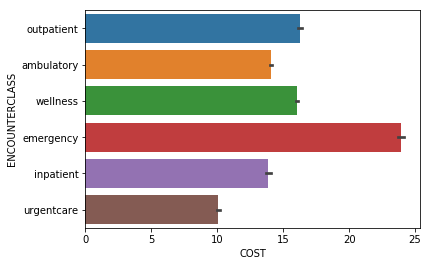

In [100]:
#4 Answer
import seaborn as sns
ax = sns.barplot(x="COST", y="ENCOUNTERCLASS", data=encounters)


When you are done your graph should look like this.  

ENCOUNTERCLASS is on they axis and  and COST on X axis.

![Imgur](https://i.imgur.com/asCDZSM.png)


# High Cost Patients Classification 

A second Challenge is determinine the most expensive individuals.  This is set as all those groups that are more than 1 standard deviation above the mean, indicated as 'HIGHCOST' in the dataset.  

(5. 5 points) 
Overall, count the total number of individuals who are high cost in NY (i.e., where encounters_ny['HIGHCOST'] is equal to 1.) Assign to the value `total_high_cost_ny`. 

Overall, count the total number of individuals who are high cost in MA (i.e., where encounters_ny['HIGHCOST'] is equal to 1.) Assign to the value `total_high_cost_ma`. 




In [101]:
#5 Answer 

total_high_cost_ny= encounters_ny[encounters_ny['HIGHCOST']==1].sum() #set to the sum
total_high_cost_ma= encounters_ma[encounters_ma['HIGHCOST']==1].sum()  #set to the sum

print(total_high_cost_ny, total_high_cost_ma)

##find out those that live in ny and then count the total number of individuals with the high cost and sum all the ones

Id                cd739368-5635-410f-a044-83a8ab86364a0bc9ed7b-b...
START             2003-04-25T09:12:58Z2010-07-05T09:12:58Z2011-0...
STOP              2003-04-25T10:12:58Z2010-07-05T11:06:58Z2011-0...
PATIENT           566aa97b-6591-4876-bae4-081b90cb1778725509e1-6...
ENCOUNTERCLASS    emergencyemergencywellnessambulatoryoutpatient...
CODE                                                  5654268231240
DESCRIPTION       Emergency Room AdmissionEmergency room admissi...
COST                                                         577020
REASONCODE                                              1.36974e+14
HIGHCOST                                                      21558
dtype: object Id                f7bdd127-5ce4-4cec-b4a4-c3f2583556b0ef42a115-7...
START             2005-09-10T04:49:37Z2009-07-12T04:49:37Z2013-0...
STOP              2005-09-10T05:04:37Z2009-07-12T05:04:37Z2013-0...
PATIENT           4b01e963-3afa-4f9b-b3b9-357ba5cdaab04b01e963-3...
PROVIDER          d733d4a9-080d-35

### Split the Train and test set for Classification with you DV set to HIGHCOST for NY Only. 


(6. 5 points) First split your data into an 70% train and 30% validation. Make sure that the results are *stratified* (equal classes in train and test) with `random_state = 111`.  

Also set the following:

```
splittest3 = y_train.iloc[5]
splittest4 = y_test.iloc[3]
```


In [102]:
#6 Answer 
#Set y equal to train encounters_ny['HIGHCOST'] 
y = encounters_ny['HIGHCOST']
#X_train, X_test, y_train, y_test  is the naming you should use
X= encounters_ny[['CODE','ENCOUNTERCLASS']]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size=0.3,
                                                    random_state=111)

#This will be used for testing. Keep it. 
splittest3 = y_train.iloc[3]
splittest4 = y_test.iloc[17]
print (splittest3, splittest4)

0 0


### Classification with Random Forrest
(8. 5 points) Use a RandomForestClassifier to predict the 'HIGH_COST' with use the `CODE` and `ENCOUNTERCLASS` as independent variables.  

Also set the following:

```
train_accuracy
test_accuracy
```

In [0]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

train_accuracy = clf.predict(X_train)
test_accuracy = clf.predict(X_test) #set to the accuracy
#Keep this.
print("Classifier Accuracy for Train: ", train_accuracy )
print("Classifier Accuracy for Test: ", test_accuracy )

### Submission
For the final submission, please submit a link to this notebook to the LMS as a `.ipynb` file.  The TA must be able to run your notebook.  

### Please make sure that your notebook above this point runs without errors.  